In [12]:
import numpy as np
import math

In [13]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

X, y = make_moons(n_samples=200, 
                  noise=0.05,
                  random_state=0)

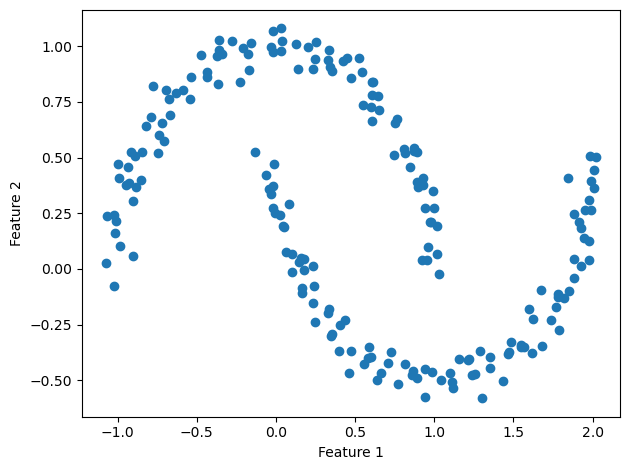

In [14]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [15]:
def rangeQuery(DB, distFunc, q, eps):
    neighbors = []
    m = len(DB)
    
    for i in range(m):
        if distFunc(DB[i], q) <= eps:
            neighbors.append(i)
    
    return neighbors

In [10]:
def DBSCAN(DB, distFunc, eps, minPts):
    
    UNDEFINED = 0
    NOISE = -1
    labels = [UNDEFINED for _ in DB]
    C = 0
    m, n = DB.shape
    
    for p in range(m):
        if labels[p] != UNDEFINED:
            continue
        neighbors = rangeQuery(DB, distFunc, DB[p], eps)
        if len(neighbors) < minPts:
            labels[p] = NOISE
            continue
        C += 1
        labels[p] = C
        
        while len(neighbors) != 0:
            q = neighbors.pop()
            if labels[q] == NOISE:
                labels[q] = C
            if labels[q] != UNDEFINED:
                continue
            labels[q] = C
            neighbors_of_neighbors = rangeQuery(DB, distFunc, DB[q], eps)
            if len(neighbors_of_neighbors) >= minPts:
                neighbors = neighbors + neighbors_of_neighbors # set union
                
    return labels

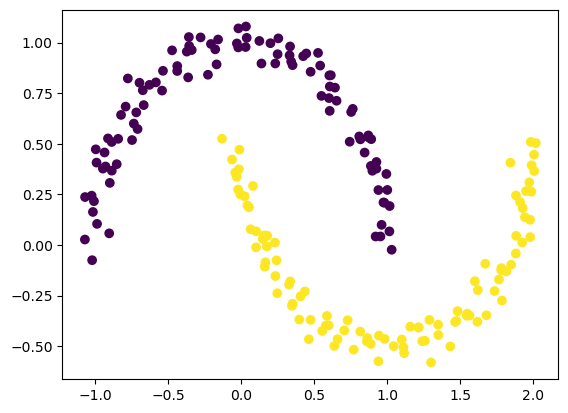

In [18]:
clusters = DBSCAN(DB = X, distFunc = math.dist, eps = 0.18, minPts = 2) 
plt.scatter(x= X[:,0], y= X[:,1], c=clusters)